# Prediction of Crop Production

In [2]:
import kagglehub
import os

path = kagglehub.dataset_download("nikhilmahajan29/crop-production-statistics-india")

Path to dataset files: /kaggle/input/crop-production-statistics-india


In [4]:
import pandas as pd

data = pd.read_csv(os.path.join(path, 'APY.csv'))

data.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB


In [7]:
data['Crop'].value_counts()

,count
Crop,
Rice,21611
Maize,20513
Moong(Green Gram),15139
Urad,14581
Sesamum,13049
Groundnut,12586
Wheat,11220
Rapeseed &Mustard,11034
Sugarcane,10942


In [8]:
pivot_df = data.pivot_table(
    index='Crop',
    columns='Crop_Year',
    values='Yield',
    aggfunc='mean'
).reset_index()


Crop_Year                   Crop         1997         1998         1999  \
0                       Arecanut     1.199600     2.310244     1.147903   
1                      Arhar/Tur     0.665933     0.907288     0.851807   
2                          Bajra     1.012835     1.008194     0.985046   
3                         Banana    28.935814    25.013651    20.807047   
4                         Barley     1.746478     1.685547     1.808233   
5                   Black pepper     0.312273     0.823143     0.923714   
6                       Cardamom     0.051250     0.068000     0.074545   
7                      Cashewnut     0.589286     0.329429     0.545854   
8                    Castor seed     1.026923     0.839006     0.602739   
9                       Coconut   7540.584561  6777.567976  7228.893068   
10                     Coriander     0.367407     0.557500     0.423158   
11                  Cotton(lint)    17.196159     1.088898     1.312288   
12                 Cowpea

In [9]:
pivot_df.columns

Index(['Crop',   1997,   1998,   1999,   2000,   2001,   2002,   2003,   2004,
         2005,   2006,   2007,   2008,   2009,   2010,   2011,   2012,   2013,
         2014,   2015,   2016,   2017,   2018,   2019,   2020],
      dtype='object', name='Crop_Year')

In [11]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crop    55 non-null     object 
 1   1997    50 non-null     float64
 2   1998    52 non-null     float64
 3   1999    52 non-null     float64
 4   2000    53 non-null     float64
 5   2001    53 non-null     float64
 6   2002    53 non-null     float64
 7   2003    53 non-null     float64
 8   2004    53 non-null     float64
 9   2005    53 non-null     float64
 10  2006    54 non-null     float64
 11  2007    53 non-null     float64
 12  2008    54 non-null     float64
 13  2009    54 non-null     float64
 14  2010    54 non-null     float64
 15  2011    54 non-null     float64
 16  2012    54 non-null     float64
 17  2013    54 non-null     float64
 18  2014    54 non-null     float64
 19  2015    54 non-null     float64
 20  2016    55 non-null     float64
 21  2017    55 non-null     float64
 22  2018

In [12]:
pivot_df = pivot_df.set_index('Crop')

In [13]:
pivot_df.columns

Index([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype='object', name='Crop_Year')

In [14]:
pivot_df = pivot_df.reindex(columns=pivot_df.columns.to_list())
pivot_df = pivot_df.reset_index()

In [16]:
pivot_df.columns

Index(['Crop',   1997,   1998,   1999,   2000,   2001,   2002,   2003,   2004,
         2005,   2006,   2007,   2008,   2009,   2010,   2011,   2012,   2013,
         2014,   2015,   2016,   2017,   2018,   2019,   2020],
      dtype='object', name='Crop_Year')

<Axes: >

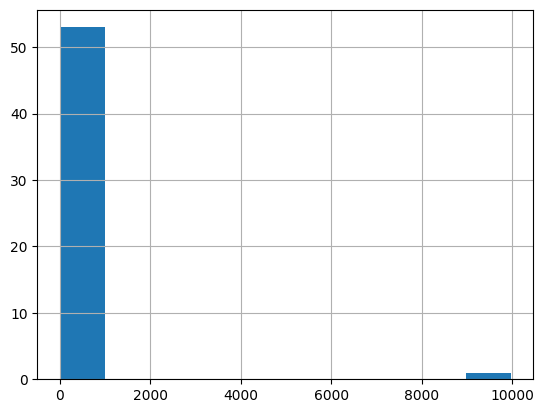

In [17]:
pivot_df[2011].hist()

<Axes: >

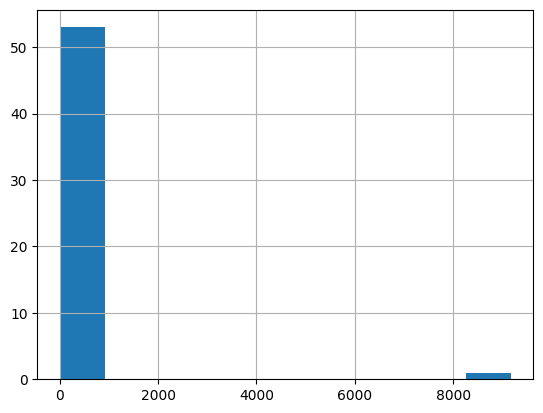

In [19]:
pivot_df[2012].hist()

<Axes: >

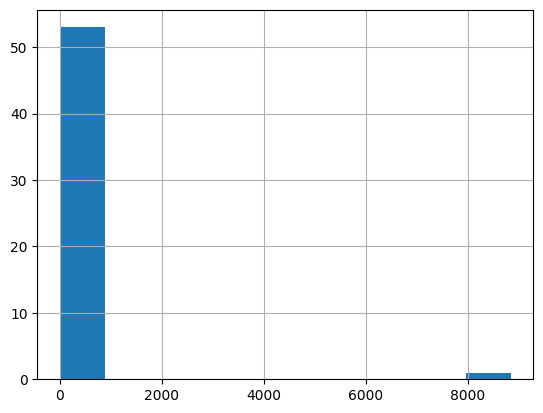

In [20]:
pivot_df[2013].hist()


In [ ]:
data.hist()

<Axes: xlabel='2013', ylabel='2014'>

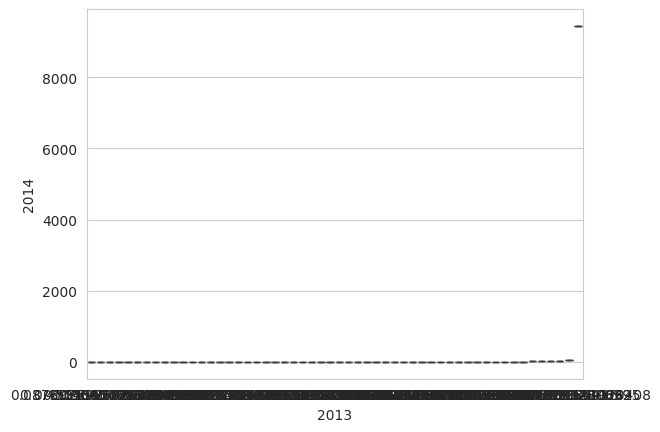

In [21]:
import seaborn as sns

sns.set_style("whitegrid")

sns.boxplot(x=2013, y=2014, data=pivot_df)

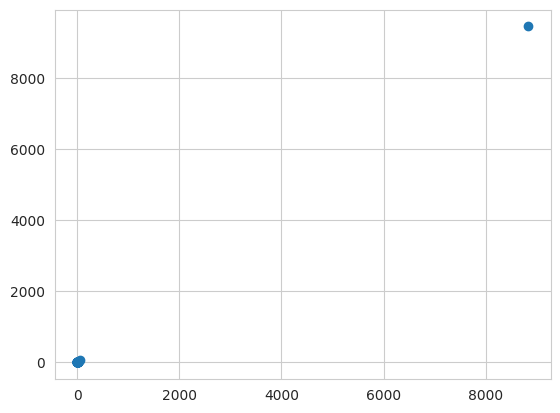

In [23]:
import matplotlib.pyplot as plt

plt.scatter(pivot_df[2013],pivot_df[2014])

plt.show()

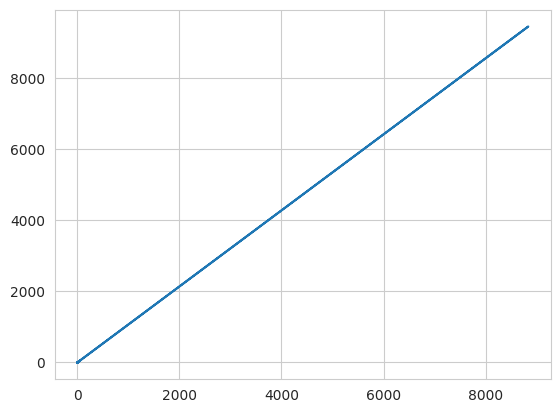

In [24]:
plt.plot(pivot_df[2013],pivot_df[2014])

plt.show()

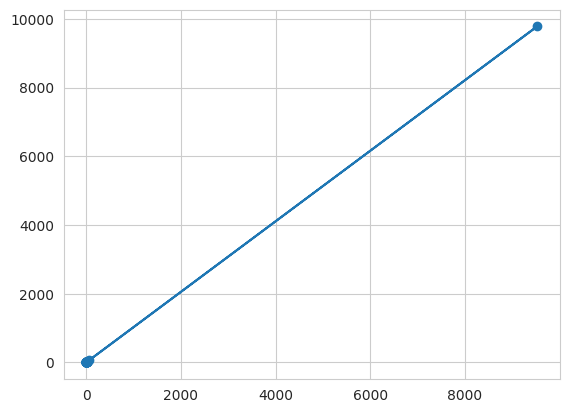

In [25]:
import matplotlib.pyplot as plt
from scipy import stats


x = pivot_df[2017]
y = pivot_df[2018]


slope, intercept, r, p, std_err = stats.linregress(x, y)


def myfunc(x):
    return slope * x + intercept


mymodel = list(map(myfunc, x))

plt.scatter(x, y)

plt.plot(x, mymodel)

plt.show()

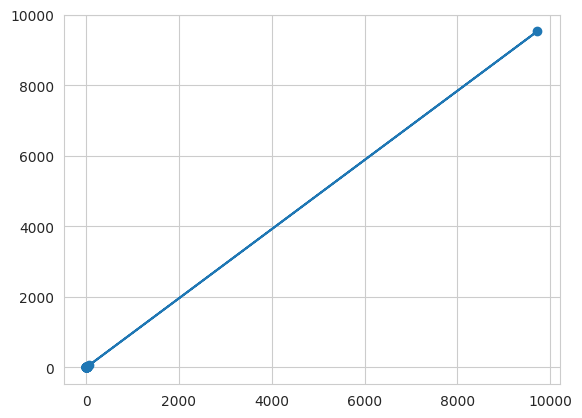

In [27]:
x = pivot_df[2016]
y = pivot_df[2017]


slope, intercept, r, p, std_err = stats.linregress(x, y)


def myfunc(x):
    return slope * x + intercept


mymodel = list(map(myfunc, x))

plt.scatter(x, y)

plt.plot(x, mymodel)

plt.show()